# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [9]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [20]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 69.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2


In [36]:
number_ofBooking = df[df['booking_complete'] > 0]['booking_complete'].count()
procent_ofBooking = number_ofBooking/50000 * 100
print(f"Number of bookings: {number_ofBooking}")
print(f"Percentage of bookings: {procent_ofBooking}%")

Number of bookings: 7478
Percentage of bookings: 14.956%


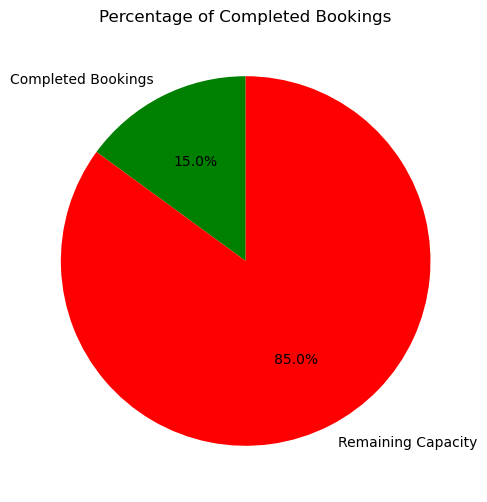

In [40]:
import matplotlib.pyplot as plt
# Pie chart labels and values
labels = ['Completed Bookings', 'Remaining Capacity']
values = [procent_ofBooking, 100 - procent_ofBooking]

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Percentage of Completed Bookings')

# Show the plot
plt.show()


In [48]:
completed_booking = df[df['booking_complete']==1]
booking_byDay= completed_booking.groupby('flight_day')['booking_complete'].count()
print(f"Number of bookings by days: {booking_byDay}")

Number of bookings by days: flight_day
1    1204
2    1129
3    1252
4    1122
5     983
6     861
7     927
Name: booking_complete, dtype: int64


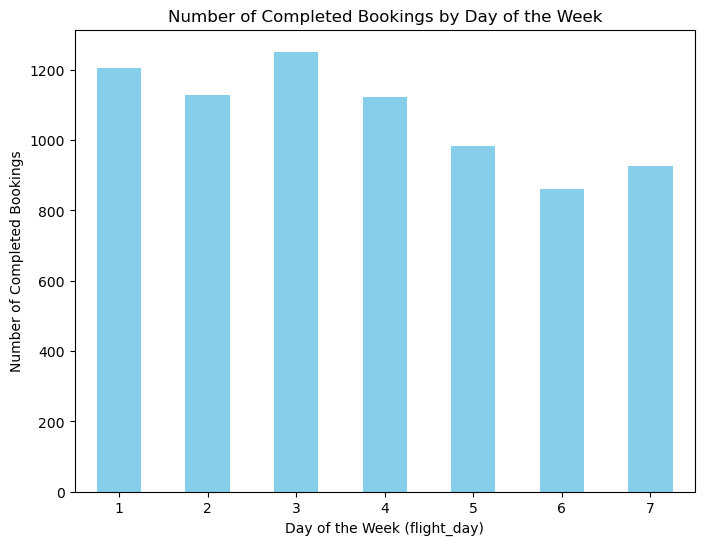

In [50]:
# Plot the results using a bar chart
plt.figure(figsize=(8, 6))
booking_byDay.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Number of Completed Bookings by Day of the Week')
plt.xlabel('Day of the Week (flight_day)')
plt.ylabel('Number of Completed Bookings')

# Show the plot
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

In [77]:

booking_byorigin= completed_booking.groupby('booking_origin')['booking_complete'].count()
booking_byorigin_sorted = booking_byorigin.sort_values(ascending=False)
print(f"Number of bookings by days: {booking_byorigin_sorted}")

Number of bookings by days: booking_origin
Malaysia                2468
Australia                900
China                    694
Indonesia                615
Japan                    478
Thailand                 470
South Korea              462
Singapore                299
Taiwan                   224
India                    131
Vietnam                  114
Macau                     95
United States             84
Philippines               75
Hong Kong                 73
New Zealand               54
Brunei                    41
Cambodia                  36
United Kingdom            21
(not set)                 14
France                    14
Myanmar (Burma)           13
Germany                   12
Saudi Arabia              11
Italy                     11
Laos                       6
Sweden                     5
Qatar                      5
Mauritius                  4
Switzerland                3
Nepal                      3
Russia                     3
Bahrain                    3


In [82]:

booking_byLead= completed_booking.groupby('purchase_lead')['booking_complete'].count()
print(f"Number of bookings by Lead: {booking_byLead}")

Number of bookings by Lead: purchase_lead
0       42
1      102
2      120
3      114
4      121
      ... 
440      1
442      1
444      1
641      1
867      1
Name: booking_complete, Length: 424, dtype: int64


In [84]:
df['is_weekend_flight'] = df['flight_day'].apply(lambda x: 1 if x in [6, 7] else 0)
def categorize_time(hour):
    if hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['flight_time_category'] = df['flight_hour'].apply(categorize_time)
df['price_sensitive'] = (df['purchase_lead'] > 30) & (df['wants_extra_baggage'] == 0) & (df['wants_preferred_seat'] == 0)
route_popularity = df['route'].value_counts().to_dict()
df['route_popularity'] = df['route'].map(route_popularity)
df['passenger_booking_ratio'] = df['num_passengers'] / (df['purchase_lead'] + 1)  # +1 to avoid division by zero
origin_popularity = df['booking_origin'].value_counts().to_dict()
df['origin_popularity'] = df['booking_origin'].map(origin_popularity)


In [94]:
#training data
from sklearn.model_selection import train_test_split
#beacuse 'booking_complete is our goal we need to drop it', and we use all other features as variables
X = df.drop(columns=['booking_complete'])
# Target (what you're trying to predict)
y = df['booking_complete']
#change categoriacal variables into numeriacal
# One-hot encoding categorical features
X = pd.get_dummies(X, columns=['sales_channel', 'trip_type', 'route', 'booking_origin', 'flight_day', 'flight_time_category','price_sensitive','route_popularity','origin_popularity'], drop_first=True)


In [96]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This will create an 80% train and 20% test split


Accuracy: 0.8559
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.15      0.23      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.58     10000
weighted avg       0.82      0.86      0.82     10000



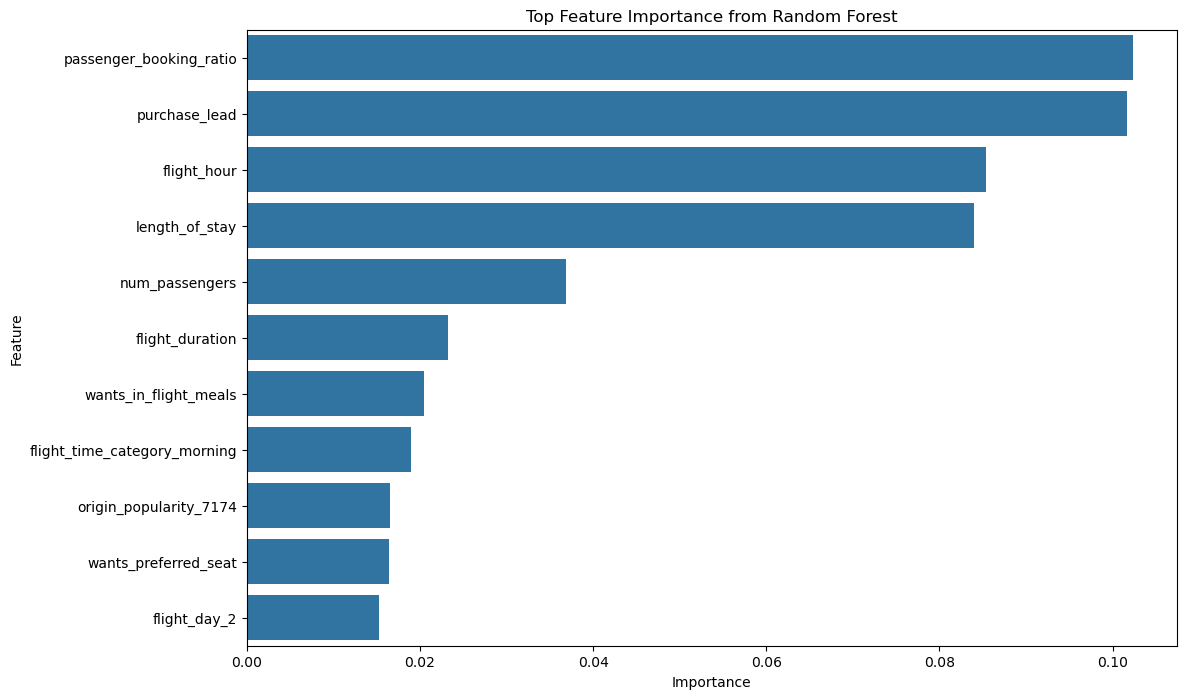

In [129]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Get feature importance from the Random Forest model
feature_importance = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Calculate the number of top features to show (10% of total features)
top_n = max(1, int(len(importance_df) * 0.01))  # Ensure at least 1 feature is shown
top_importance_df = importance_df.head(top_n)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_importance_df)
plt.title('Top Feature Importance from Random Forest')
plt.show()



In [100]:
#evaluate the model

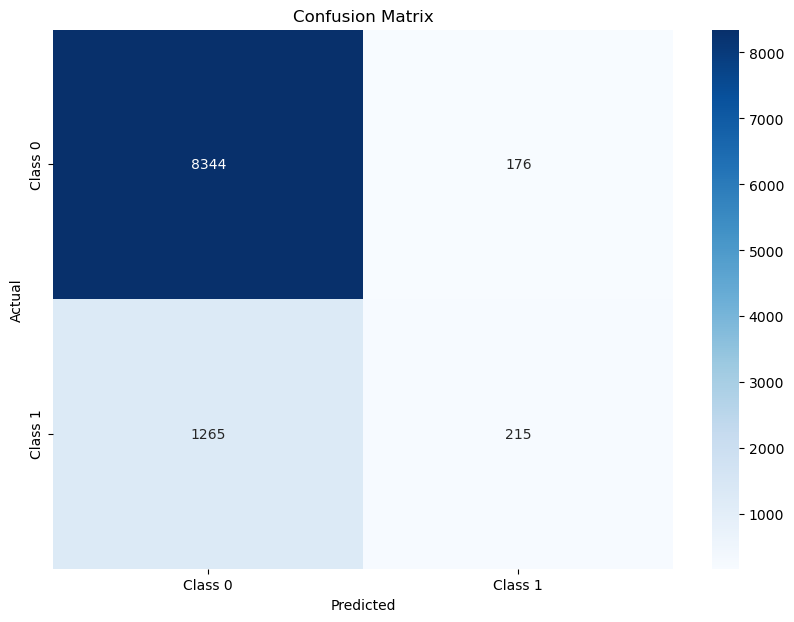

In [131]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
